# Поиск корреляции между курсом биткоина и акциями компании Tesla

Нулевая гипотеза: корреляция между курсом биткоина и акциями компании Tesla в целом близка к 0 \
Альтернативная гипотеза: существует довольно большая корреляция между курсом биткоина и акциями компании Tesla

In [30]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

Загружаем данные и приводим их в нужный нам вид\
Стоимость акциий Tesla была взята из GOOGLEFINANCE \
Стоимость биткоина https://investfunds.ru/indexes/9021/

In [31]:
url = "https://docs.google.com/spreadsheets/d/1iz5oC8onRD61IYMxi68RYCoT5nMZ5AMHHwG5rKvj6mo/export?format=csv"

In [32]:
info_Tesla = pd.read_csv(url, usecols=["Date", "Close"]) 
info_Tesla = info_Tesla.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
info_Tesla.rename(columns = {'Close' : 'Price Tesla'}, inplace = True) 

In [33]:
def parse_dates(dates):
    return [
        datetime.strptime(date, '%d.%m.%Y %H:%M:%S').strftime('%d.%m.%Y')
        for date in dates
    ]

info_Tesla['Date'] = parse_dates(info_Tesla['Date']) 

In [34]:
info_BTC = pd.read_csv(url, usecols=["Date BTC", "Price BTC"]) 
info_BTC.rename(columns = {'Date BTC' : 'Date'}, inplace = True)

ЗАМЕЧАНИЕ \
Для удобства просмотра графика, стоимость биткоина была разделена на 100

In [35]:
def to_float(data, dim = 1):
    return [
        float(num.replace(',','.')) / dim
        for num in data
    ]

info_BTC['Price BTC'] = to_float(info_BTC['Price BTC'], 100)
info_Tesla['Price Tesla'] = to_float(info_Tesla['Price Tesla'])

In [36]:
all_info = pd.merge(info_Tesla, info_BTC, how='left', on=['Date'])

Text(0, 0.5, 'Price')

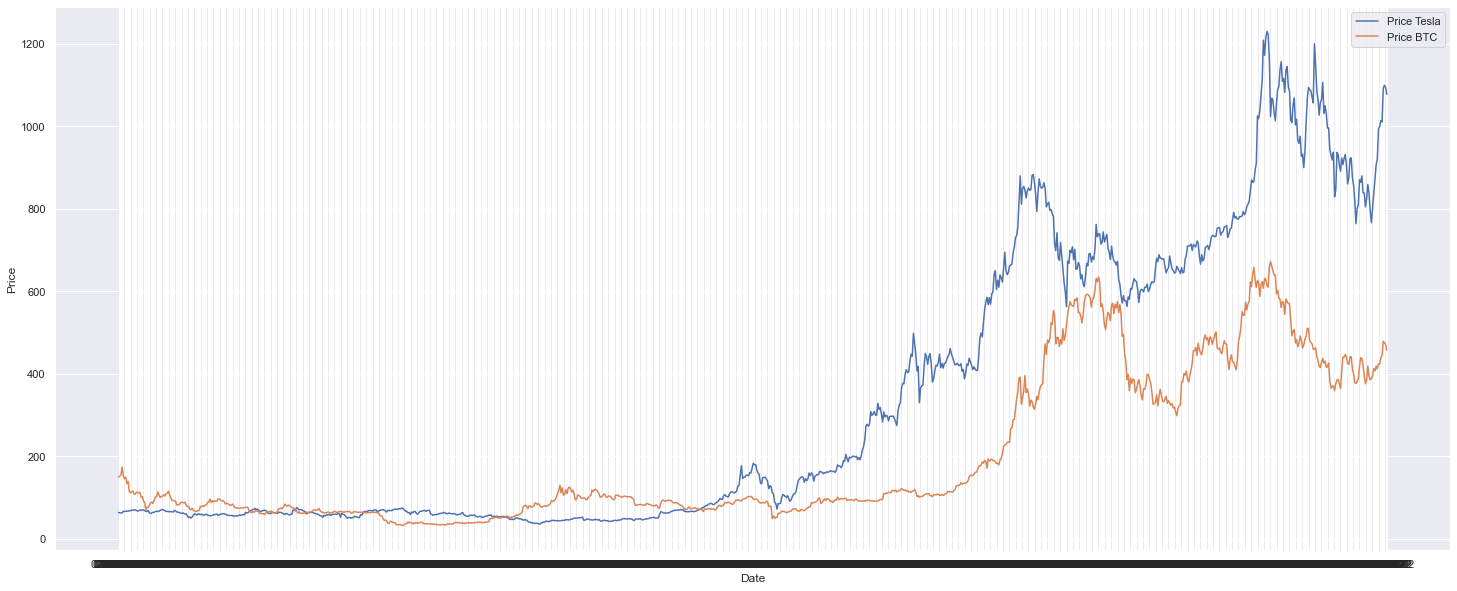

In [37]:
sns.set(rc={'figure.figsize':(25.,10.)})
ax = sns.lineplot(data=all_info, x='Date', y='Price Tesla')
ax = sns.lineplot(data=all_info, x='Date', y='Price BTC')
ax.legend(labels=['Price Tesla','Price BTC'])
ax.set_xlabel('Date')
ax.set_ylabel('Price')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Price BTC', ylabel='Price Tesla'>

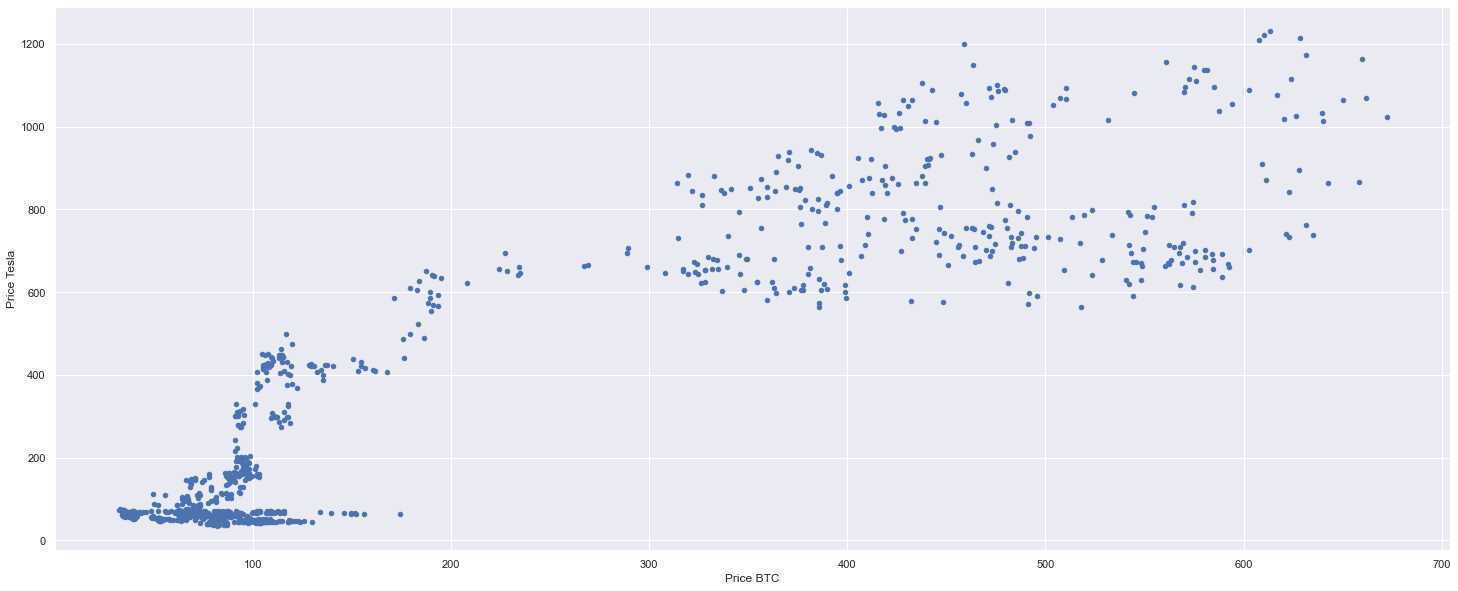

In [38]:
all_info.plot(kind = 'scatter',  x='Price BTC', y='Price Tesla')

Считаем корреляцию

In [39]:
corr = all_info.corr()
corr

,Price Tesla,Price BTC
Price Tesla,1.000000,0.914003
Price BTC,0.914003,1.000000


Отвергаем нулевую гипотезу, корреляция близка к 1